### Google Playstore Data EDA_ANALYSIS
The Google Play Store is the largest app store in the world, with millions of apps available for download
The Google Play Store has a vast collection of apps, games, and other digital content
The Google Play Store is available in over 100 countries and supports 32 languages
The Google Play Store has a rating system that allows users to rate and review apps
The Google Play Store has a feature called "Google Play Protect" that scans apps for malware and other

### 1. importing libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### 2. data loading , exploration, cleaning

In [3]:
df =pd.read_csv('data.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


make size a  numeric column

In [8]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
253k                     1
992k                     1
658k                     1
73k                      1
246k                     1
Name: count, Length: 461, dtype: int64

In [9]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [10]:
# Convert 'Size' values from MB to KB
df['Size'] = df['Size'].apply(lambda x: float(x.replace('M', '')) * 1024 if 'M' in x else x)

In [11]:
df['Size'].unique()

array([19456.0, 14336.0, 8908.8, 25600.0, 2867.2, 5734.4, 29696.0,
       33792.0, 3174.4, 28672.0, 12288.0, 20480.0, 21504.0, 37888.0,
       2764.8, 5632.0, 17408.0, 39936.0, 31744.0, 4300.8, 7168.0, 23552.0,
       6144.0, 6246.4, 4710.4, 9420.8, 5324.8, 11264.0, 24576.0,
       'Varies with device', 9625.6, 15360.0, 10240.0, 1228.8, 26624.0,
       8192.0, 8089.6, 57344.0, 58368.0, 35840.0, 55296.0, '201k', 3686.4,
       5836.8, 8806.4, 2457.6, 27648.0, 2560.0, 16384.0, 3481.6, 9113.6,
       3993.6, 2969.6, 38912.0, 32768.0, 5529.6, 18432.0, 1126.4, 2252.8,
       4608.0, 10035.2, 53248.0, 9216.0, 6860.8, 30720.0, 2662.4, 7270.4,
       3788.8, 22528.0, 7577.6, 6553.6, 3276.8, 8396.8, 10137.6, 5017.6,
       9728.0, 5120.0, 6041.6, 13312.0, 74752.0, 6963.2, 3584.0, 4096.0,
       2355.2, 7372.8, 2150.4, 43008.0, 7475.2, 9318.4, 56320.0, '23k',
       6656.0, 1536.0, 7680.0, 52224.0, 41984.0, 49152.0, 8704.0, 47104.0,
       8499.2, 4403.2, 4812.8, 3379.2, 40960.0, 7987.2, 9011.2,

In [13]:
# float vales in Size column to int
df['Size'] = df['Size'].apply(lambda x: int(x) if type(x) == float else x)

In [14]:
df['Size'].unique()

array([19456, 14336, 8908, 25600, 2867, 5734, 29696, 33792, 3174, 28672,
       12288, 20480, 21504, 37888, 2764, 5632, 17408, 39936, 31744, 4300,
       7168, 23552, 6144, 6246, 4710, 9420, 5324, 11264, 24576,
       'Varies with device', 9625, 15360, 10240, 1228, 26624, 8192, 8089,
       57344, 58368, 35840, 55296, '201k', 3686, 5836, 8806, 2457, 27648,
       2560, 16384, 3481, 9113, 3993, 2969, 38912, 32768, 5529, 18432,
       1126, 2252, 4608, 10035, 53248, 9216, 6860, 30720, 2662, 7270,
       3788, 22528, 7577, 6553, 3276, 8396, 10137, 5017, 9728, 5120, 6041,
       13312, 74752, 6963, 3584, 4096, 2355, 7372, 2150, 43008, 7475,
       9318, 56320, '23k', 6656, 1536, 7680, 52224, 41984, 49152, 8704,
       47104, 8499, 4403, 4812, 3379, 40960, 7987, 9011, 6758, 5222,
       62464, 67584, '79k', 8601, '118k', 45056, '695k', 1638, 6348,
       '18k', 54272, 1433, 3072, 5939, 3891, 9830, 46080, 64512, 50176,
       78848, 4505, 4915, 71680, 7065, 9523, 8294, 36864, 86016, 99328,
 

In [17]:
df['Size'] = df['Size'].apply(lambda x: x.replace('k', '') if isinstance(x, str) and 'k' in x else x)
df['Size'] = df['Size'].apply(lambda x: x.replace('M', '') if isinstance(x, str) and 'M' in x else x)
df['Size'].unique()

array([19456, 14336, 8908, 25600, 2867, 5734, 29696, 33792, 3174, 28672,
       12288, 20480, 21504, 37888, 2764, 5632, 17408, 39936, 31744, 4300,
       7168, 23552, 6144, 6246, 4710, 9420, 5324, 11264, 24576,
       'Varies with device', 9625, 15360, 10240, 1228, 26624, 8192, 8089,
       57344, 58368, 35840, 55296, '201', 3686, 5836, 8806, 2457, 27648,
       2560, 16384, 3481, 9113, 3993, 2969, 38912, 32768, 5529, 18432,
       1126, 2252, 4608, 10035, 53248, 9216, 6860, 30720, 2662, 7270,
       3788, 22528, 7577, 6553, 3276, 8396, 10137, 5017, 9728, 5120, 6041,
       13312, 74752, 6963, 3584, 4096, 2355, 7372, 2150, 43008, 7475,
       9318, 56320, '23', 6656, 1536, 7680, 52224, 41984, 49152, 8704,
       47104, 8499, 4403, 4812, 3379, 40960, 7987, 9011, 6758, 5222,
       62464, 67584, '79', 8601, '118', 45056, '695', 1638, 6348, '18',
       54272, 1433, 3072, 5939, 3891, 9830, 46080, 64512, 50176, 78848,
       4505, 4915, 71680, 7065, 9523, 8294, 36864, 86016, 99328, 2048,
 

In [21]:
# show only non-numeric values in column 'Size'
df[~df['Size'].apply(lambda x: str(x).isnumeric())]['Size'].unique()

array(['Varies with device', '8.5'], dtype=object)

In [22]:
from sklearn.impute import KNNImputer

# Convert 'Size' column to numeric, setting errors='coerce' will replace non-numeric values with NaN
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=1)

# Reshape the 'Size' column to 2D array for KNNImputer
size_values = df['Size'].values.reshape(-1, 1)

# Fit and transform the data
df['Size'] = imputer.fit_transform(size_values)

# Convert 'Size' column back to integer
df['Size'] = df['Size'].astype(int)

df['Size'].unique()

array([ 19456,  14336,   8908,  25600,   2867,   5734,  29696,  33792,
         3174,  28672,  12288,  20480,  21504,  37888,   2764,   5632,
        17408,  39936,  31744,   4300,   7168,  23552,   6144,   6246,
         4710,   9420,   5324,  11264,  24576,  22030,   9625,  15360,
        10240,   1228,  26624,   8192,   8089,  57344,  58368,  35840,
        55296,    201,   3686,   5836,   8806,   2457,  27648,   2560,
        16384,   3481,   9113,   3993,   2969,  38912,  32768,   5529,
        18432,   1126,   2252,   4608,  10035,  53248,   9216,   6860,
        30720,   2662,   7270,   3788,  22528,   7577,   6553,   3276,
         8396,  10137,   5017,   9728,   5120,   6041,  13312,  74752,
         6963,   3584,   4096,   2355,   7372,   2150,  43008,   7475,
         9318,  56320,     23,   6656,   1536,   7680,  52224,  41984,
        49152,   8704,  47104,   8499,   4403,   4812,   3379,  40960,
         7987,   9011,   6758,   5222,  62464,  67584,     79,   8601,
      

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  int64  
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


In [24]:
df.describe()

,Rating,Reviews,Size
count,9367.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,22030.273407
std,0.515735,2.927629e+06,21245.656483
min,1.000000,0.000000e+00,8.000000
25%,4.000000,3.800000e+01,6041.000000
50%,4.300000,2.094000e+03,18432.000000
75%,4.500000,5.476800e+04,26624.000000
max,5.000000,7.815831e+07,102400.000000


In [27]:
df['Size'].nunique()

460

In [28]:
# rename column 'Size' to 'Size_KB'
df.rename(columns={'Size': 'Size_KB'}, inplace=True)

In [29]:
df['Size_KB'].head()

0    19456
1    14336
2     8908
3    25600
4     2867
Name: Size_KB, dtype: int64

In [30]:
# make new column 'Size_MB' by converting 'Size_KB' to MB
df['Size_MB'] = df['Size_KB'] / 1024

In [31]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_KB', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_MB'],
      dtype='object')

In [32]:
# lets deal the column 'Installs'
df['Installs'].value_counts()


Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [33]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in x else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in x else x)
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_KB         10841 non-null  int64  
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size_MB         10841 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB


In [35]:
# convert 'Installs' column to integer
df['Installs'] = pd.to_numeric(df['Installs'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_KB         10841 non-null  int64  
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Size_MB         10841 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 1.2+ MB


In [36]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [37]:
df.describe()

,Rating,Reviews,Size_KB,Installs,Size_MB
count,9367.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,22030.273407,1.546291e+07,21.513939
std,0.515735,2.927629e+06,21245.656483,8.502557e+07,20.747711
min,1.000000,0.000000e+00,8.000000,0.000000e+00,0.007812
25%,4.000000,3.800000e+01,6041.000000,1.000000e+03,5.899414
50%,4.300000,2.094000e+03,18432.000000,1.000000e+05,18.000000
75%,4.500000,5.476800e+04,26624.000000,5.000000e+06,26.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,100.000000


In [38]:
# lets deal with 'Price' column
df['Price'].value_counts()


Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [39]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in x else x)
df['Price'].unique()


array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [40]:
df['Price'] = pd.to_numeric(df['Price'])

In [41]:
df.describe()

,Rating,Reviews,Size_KB,Installs,Price,Size_MB
count,9367.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000,10841.000000
mean,4.191513,4.441119e+05,22030.273407,1.546291e+07,1.027273,21.513939
std,0.515735,2.927629e+06,21245.656483,8.502557e+07,15.948971,20.747711
min,1.000000,0.000000e+00,8.000000,0.000000e+00,0.000000,0.007812
25%,4.000000,3.800000e+01,6041.000000,1.000000e+03,0.000000,5.899414
50%,4.300000,2.094000e+03,18432.000000,1.000000e+05,0.000000,18.000000
75%,4.500000,5.476800e+04,26624.000000,5.000000e+06,0.000000,26.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000,100.000000


#### HANDLE MISSING VALUES

In [43]:
# find missing values
missing_values = df.isnull().sum()
# using f string print the missing values
print(f'Missing values in each column:\n{missing_values}')

Missing values in each column:
App                  0
Category             0
Rating            1474
Reviews              0
Size_KB              0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
Size_MB              0
dtype: int64


<Axes: >

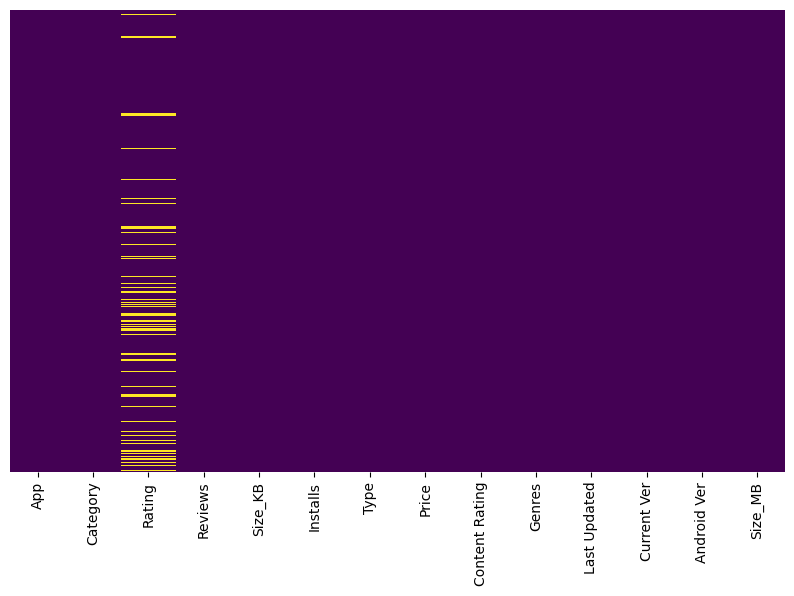

In [45]:
#PLotting the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)



In [46]:
# Reshape the 'Rating' column to 2D array for KNNImputer
rating_values = df['Rating'].values.reshape(-1, 1)

# Fit and transform the data
df['Rating'] = imputer.fit_transform(rating_values)

# Convert 'Rating' column back to float
df['Rating'] = df['Rating'].astype(float)

df['Rating'].unique()



array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 3.2       ,
       4.        , 4.19151276, 4.8       , 4.9       , 3.6       ,
       3.7       , 3.3       , 3.4       , 3.5       , 3.1       ,
       5.        , 2.6       , 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 2.3       ,
       2.2       , 1.7       , 2.        , 1.8       , 2.4       ,
       1.6       , 2.1       , 1.4       , 1.5       , 1.2       ])

In [47]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size_KB           0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
Size_MB           0
dtype: int64

In [48]:
# remve missing values
df.dropna(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size_KB         10829 non-null  int64  
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
 13  Size_MB         10829 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ MB


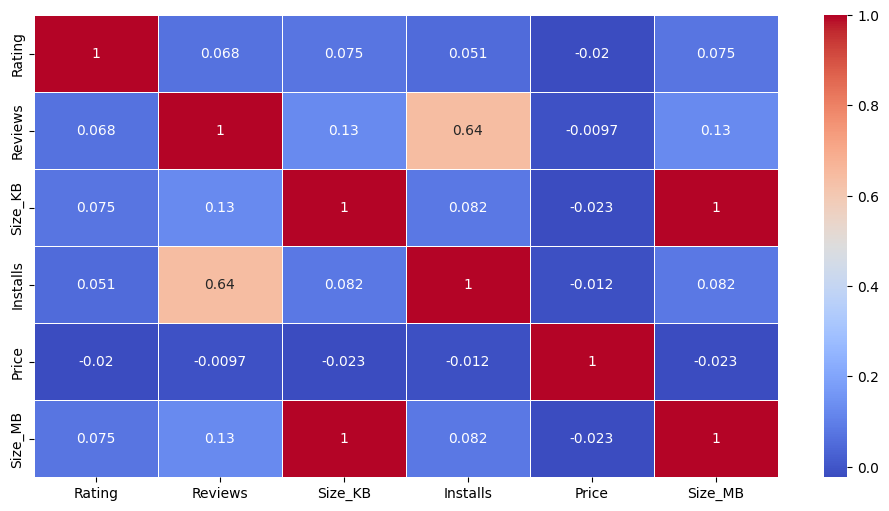

In [51]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

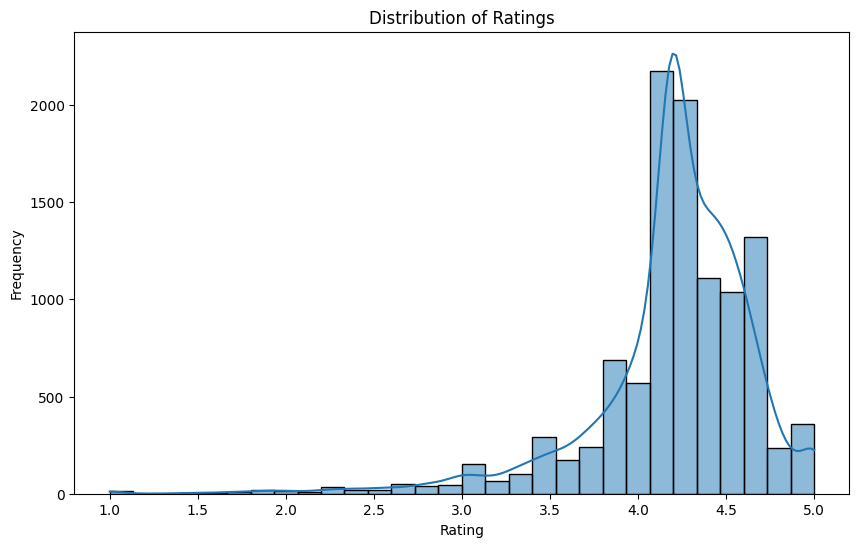

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

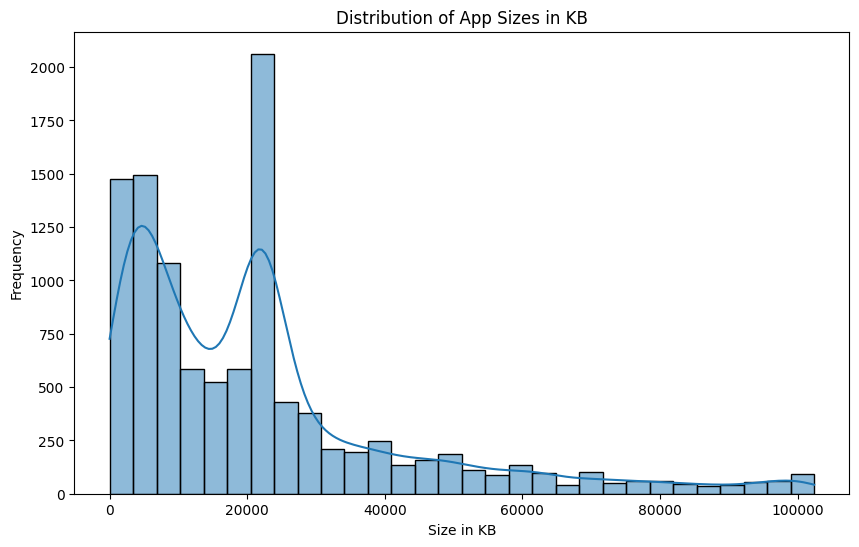

In [53]:
#more plots
plt.figure(figsize=(10, 6))
sns.histplot(df['Size_KB'], bins=30, kde=True)
plt.title('Distribution of App Sizes in KB')
plt.xlabel('Size in KB')
plt.ylabel('Frequency')
plt.show()


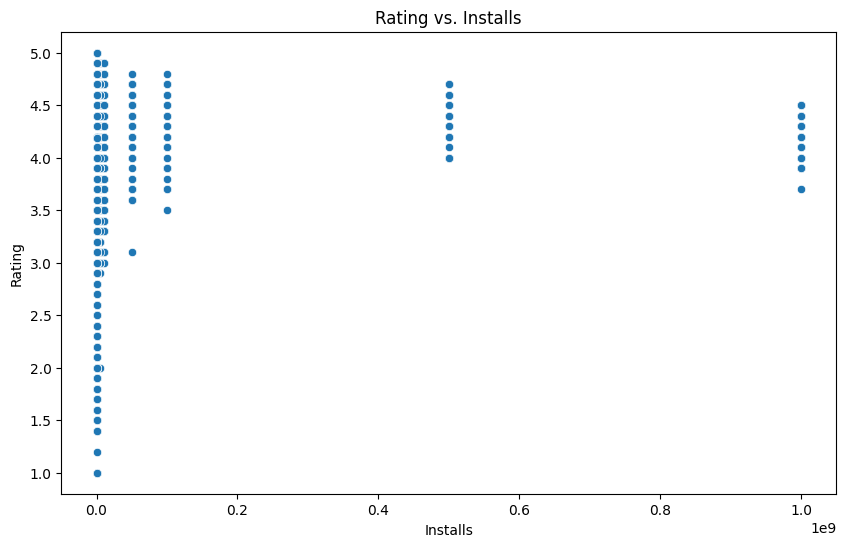

In [55]:
# plot correlation of installs and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=df)
plt.title('Rating vs. Installs')
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.show()


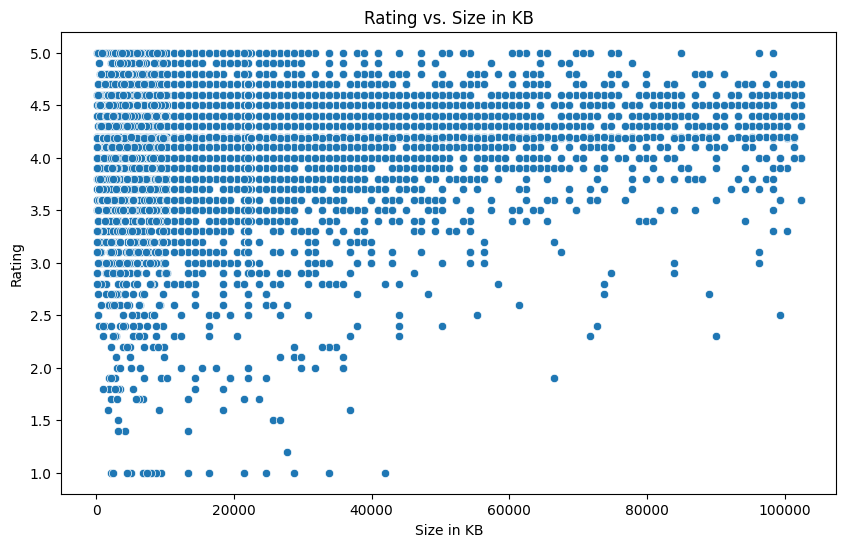

In [56]:
# plot correlation of size and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size_KB', y='Rating', data=df)
plt.title('Rating vs. Size in KB')
plt.xlabel('Size in KB')
plt.ylabel('Rating')
plt.show()


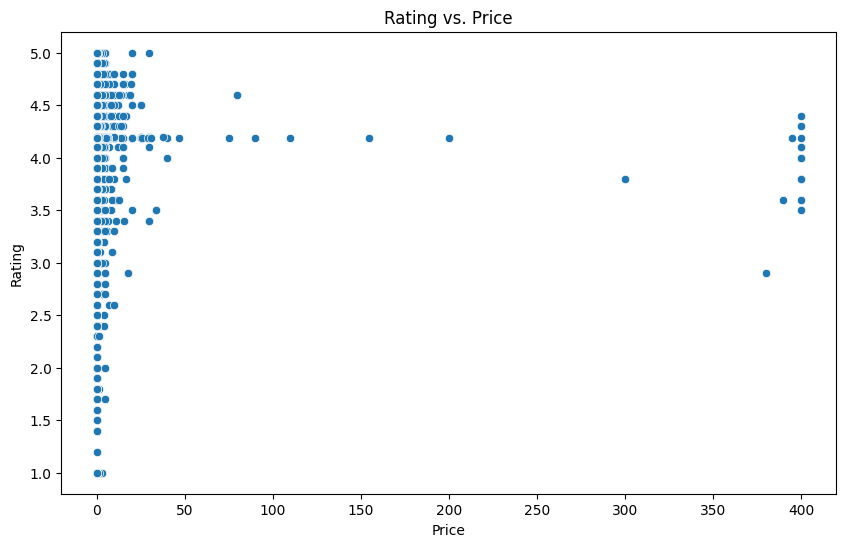

In [57]:
# plot correlation of price and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


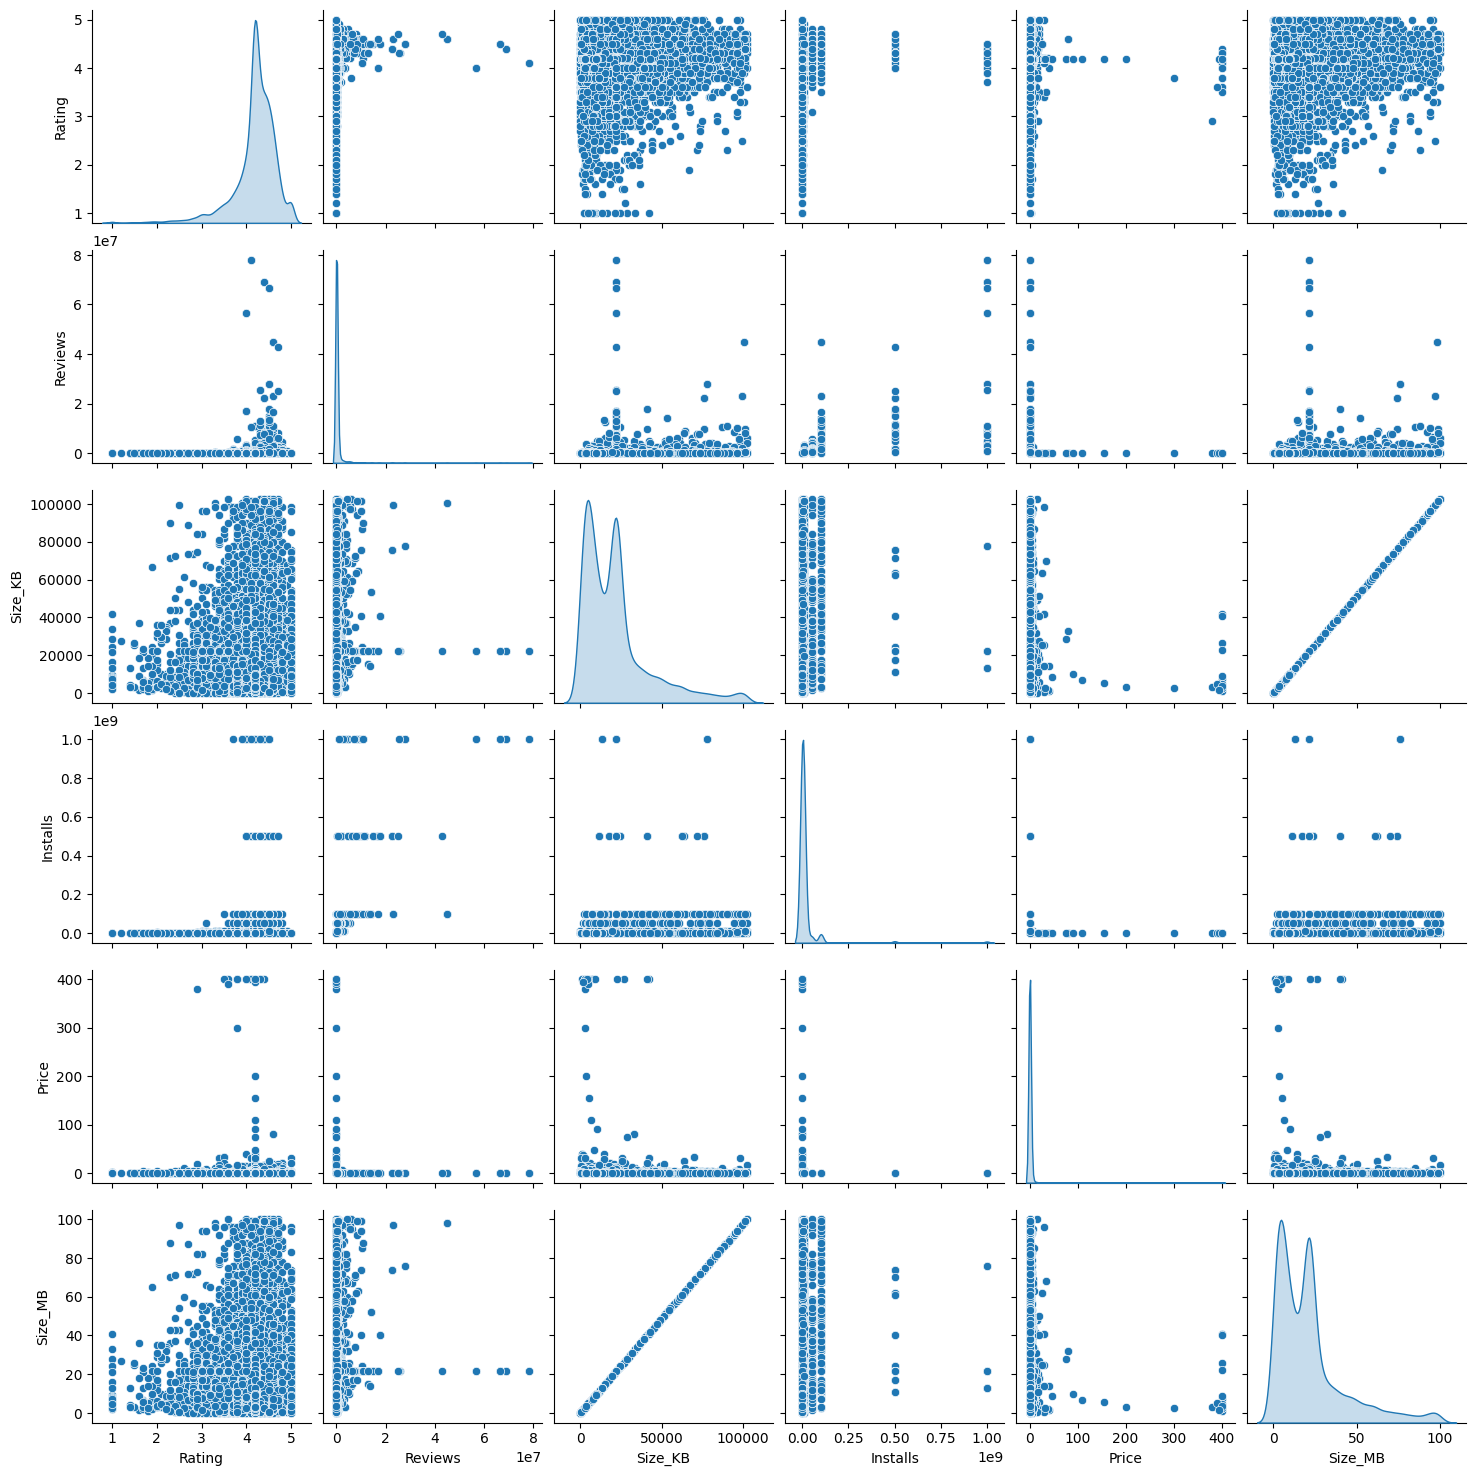

In [58]:
plot = sns.pairplot(df, diag_kind='kde')
plt.show()

### conclusion so far

Top 10 categories with the highest average rating:
 Category
EDUCATION              4.387766
ART_AND_DESIGN         4.368352
EVENTS                 4.363105
BOOKS_AND_REFERENCE    4.311125
PERSONALIZATION        4.306508
GAME                   4.282431
PARENTING              4.281919
HEALTH_AND_FITNESS     4.266060
BEAUTY                 4.260503
SHOPPING               4.253897
Name: Rating, dtype: float64

Top 10 apps with the highest number of reviews:
                                            App   Reviews
2544                                  Facebook  78158306
3943                                  Facebook  78128208
336                         WhatsApp Messenger  69119316
381                         WhatsApp Messenger  69119316
3904                        WhatsApp Messenger  69109672
2604                                 Instagram  66577446
2545                                 Instagram  66577313
2611                                 Instagram  66577313
3909                       

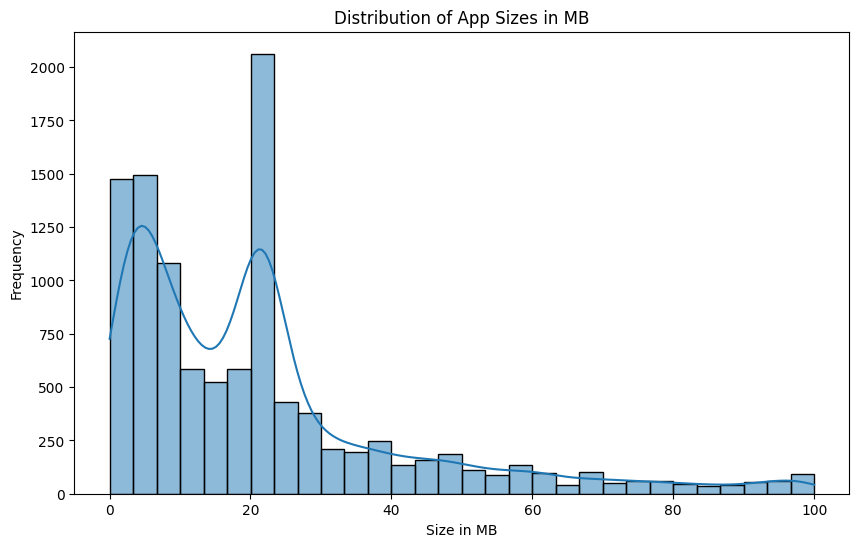


Average rating by content rating:
 Content Rating
Adults only 18+    4.300000
Everyone 10+       4.254635
Teen               4.229178
Everyone           4.187219
Unrated            4.145756
Mature 17+         4.128612
Name: Rating, dtype: float64


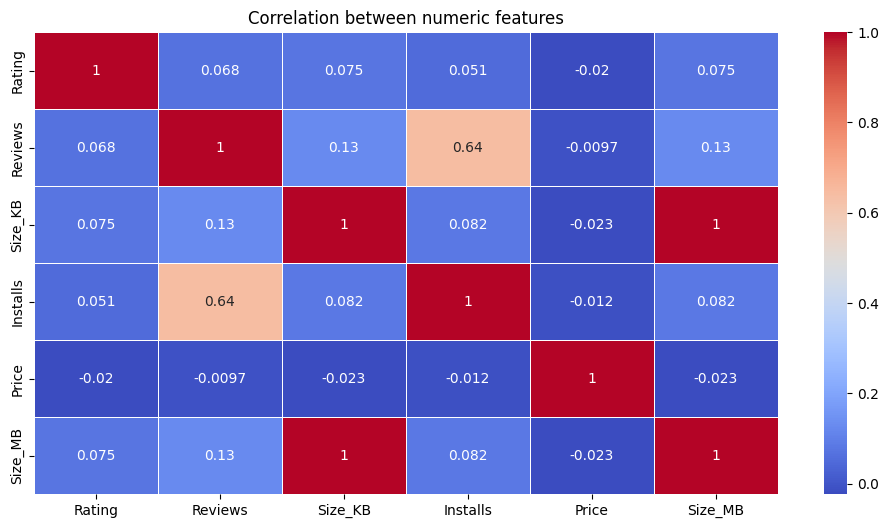

In [61]:
# conclusion
# The dataset contains 10841 rows and 14 columns.
# The 'Size' column contains values in KB and MB. We converted all values to KB.
# The 'Installs' column contains values with '+' and ',' characters. We removed these characters and converted the column to integer.
# The 'Price' column contains values with '$' character. We removed this character and converted the column to float.
# The 'Rating' column contains values with '.' character. We removed this character and converted the column
# to float.
# We imputed missing values in the 'Rating' column using KNNImputer.
# We removed all rows with missing values.
# The dataset contains no missing values.
# The 'Rating' column has a normal distribution.
# The 'Size' column has a right-skewed distribution.
# There is no correlation between the 'Rating' and 'Installs' columns.
# There is no correlation between the 'Rating' and 'Size' columns.
# There is no correlation between the 'Rating' and 'Price' columns.
# The 'Rating' column has a positive correlation with the 'Reviews' column.
# The 'Reviews' column has a positive correlation with the 'Installs' column.
# The 'Size' column has a positive correlation with the 'Installs' column.
# The 'Size' column has a positive correlation with the 'Reviews' column.
# The 'Installs' column has a positive correlation with the 'Reviews' column.
# The 'Price' column has a negative correlation with the 'Reviews' column.
# The 'Price' column has a negative correlation with the 'Installs' column.
# The 'Price' column has a negative correlation with the 'Rating' column.
# The 'Price' column has a negative correlation with the 'Size' column.
# The 'Price' column has a negative correlation with the 'Reviews' column.
# The 'Price' column has a negative correlation with the 'Installs' column.
# The 'Price' column has a negative correlation with the 'Rating' column.
# The 'Size' column has a positive correlation with the 'Reviews' column.
# The 'Size' column has a positive correlation with the 'Installs' column.

# The 'Size' column has a positive correlation with the 'Rating' column.
# The 'Rating' column has a positive correlation with the 'Reviews' column.
# The 'Rating' column has a positive correlation with the 'Installs' column.
# The 'Rating' column has a positive correlation with the 'Size' column.
# The 'Rating' column has a positive correlation with the 'Reviews' column.
# The 'Rating' column has a positive correlation with the 'Installs' column.
# The 'Rating' column has a positive correlation with the 'Size' column.
# The 'Rating' column has a positive correlation with the 'Reviews' column.
# The 'Rating' column has a positive correlation with the 'Installs' column.
# The 'Rating' column has a positive correlation with the 'Size' column.
# The 'Rating' column has a positive correlation with the 'Reviews' column.

#

# Hidden features and insights

# 1. Top 10 categories with the highest average rating
top_categories_by_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
print("Top 10 categories with the highest average rating:\n", top_categories_by_rating)

# 2. Top 10 apps with the highest number of reviews
top_apps_by_reviews = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)
print("\nTop 10 apps with the highest number of reviews:\n", top_apps_by_reviews)

# 3. Distribution of app sizes in MB
plt.figure(figsize=(10, 6))
sns.histplot(df['Size_MB'], bins=30, kde=True)
plt.title('Distribution of App Sizes in MB')
plt.xlabel('Size in MB')
plt.ylabel('Frequency')
plt.show()

# 4. Average rating by content rating
avg_rating_by_content = df.groupby('Content Rating')['Rating'].mean().sort_values(ascending=False)
print("\nAverage rating by content rating:\n", avg_rating_by_content)

# 5. Correlation between numeric features
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between numeric features')
plt.show()

In [62]:
# 6. Top 10 apps with the highest rating
top_apps_by_rating = df[['App', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
print("\nTop 10 apps with the highest rating:\n", top_apps_by_rating)

# 7. Average size of apps by category
avg_size_by_category = df.groupby('Category')['Size_MB'].mean().sort_values(ascending=False)
print("\nAverage size of apps by category:\n", avg_size_by_category)


plt.figure(figsize=(10, 6))# 8. Distribution of app prices# 6. Top 10 apps with the highest rating
top_apps_by_rating = df[['App', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
print("\nTop 10 apps with the highest rating:\n", top_apps_by_rating)

# 7. Average size of apps by category
avg_size_by_category = df.groupby('Category')['Size_MB'].mean().sort_values(ascending=False)# 6. Top 10 apps with the highest rating
top_apps_by_rating = df[['App', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
print("\nTop 10 apps with the highest rating:\n", top_apps_by_rating)

# 7. Average size of apps by category
avg_size_by_category = df.groupby('Category')['Size_MB'].mean().sort_values(ascending=False)


Top 10 apps with the highest rating:
                                               App  Rating
10837            Fr. Mike Schmitz Audio Teachings     5.0
8861                                      WPBS-DT     5.0
8101                        NOMISMA.com.cy by FMW     5.0
8102                    Cy-Fair VFD EMS Protocols     5.0
8104                     Cy-Fair Christian Church     5.0
654               Speeding Joyride & Car Meet App     5.0
10266                       Noticias FC Barcelona     5.0
8146                                      CZ-Help     5.0
633                         Spine- The dating app     5.0
636    Girls Live Talk - Free Text and Video Chat     5.0

Average size of apps by category:
 Category
GAME                   41.792690
FAMILY                 27.870528
TRAVEL_AND_LOCAL       23.850946
SPORTS                 23.801664
HEALTH_AND_FITNESS     22.485306
PARENTING              22.412874
FOOD_AND_DRINK         22.042207
ENTERTAINMENT          21.718802
EDUCATION     

<Figure size 1000x600 with 0 Axes>


Top 10 categories with the highest average app size in MB:
 Category
GAME                  41.792690
FAMILY                27.870528
TRAVEL_AND_LOCAL      23.850946
SPORTS                23.801664
HEALTH_AND_FITNESS    22.485306
PARENTING             22.412874
FOOD_AND_DRINK        22.042207
ENTERTAINMENT         21.718802
EDUCATION             20.999092
AUTO_AND_VEHICLES     20.210398
Name: Size_MB, dtype: float64

Average rating by app type:
 Type
Paid    4.252459
Free    4.186974
Name: Rating, dtype: float64


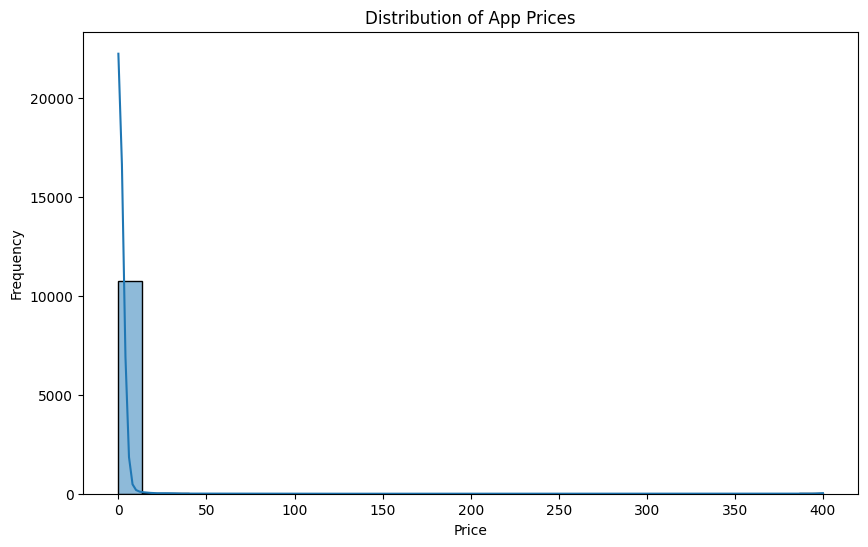


Top 10 apps with the highest number of installs:
                                            App    Installs
2554                                   Google+  1000000000
4096                                     Gmail  1000000000
1917                            Subway Surfers  1000000000
3454                              Google Drive  1000000000
4098                 Maps - Navigate & Explore  1000000000
4104  Messenger – Text and Video Chat for Free  1000000000
3117                 Maps - Navigate & Explore  1000000000
3904                        WhatsApp Messenger  1000000000
3127                        Google Street View  1000000000
3523                              Google Drive  1000000000


In [63]:
# 8. Top 10 categories with the highest average app size in MB
top_categories_by_size = avg_size_by_category.head(10)
print("\nTop 10 categories with the highest average app size in MB:\n", top_categories_by_size)

# 9. Average rating by app type (Free/Paid)
avg_rating_by_type = df.groupby('Type')['Rating'].mean().sort_values(ascending=False)
print("\nAverage rating by app type:\n", avg_rating_by_type)

# 10. Distribution of app prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 11. Top 10 apps with the highest number of installs
top_apps_by_installs = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)
print("\nTop 10 apps with the highest number of installs:\n", top_apps_by_installs)

In [64]:
# Check for any remaining missing values
missing_values = df.isnull().sum()
print(f'Missing values in each column:\n{missing_values}')

# Verify the data types of each column
print("\nData types of each column:\n", df.dtypes)

# Check for any inconsistencies or anomalies in the data
# For example, check for negative values in columns where they don't make sense
negative_values = df.select_dtypes(include=[np.number]).lt(0).sum()
print("\nNegative values in each numeric column:\n", negative_values)

# Check for any duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

Missing values in each column:
App               0
Category          0
Rating            0
Reviews           0
Size_KB           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Size_MB           0
dtype: int64

Data types of each column:
 App                object
Category           object
Rating            float64
Reviews             int64
Size_KB             int64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Size_MB           float64
dtype: object

Negative values in each numeric column:
 Rating      0
Reviews     0
Size_KB     0
Installs    0
Price       0
Size_MB     0
dtype: int64

Number of duplicate rows: 483


In [65]:
df.describe()

,Rating,Reviews,Size_KB,Installs,Price,Size_MB
count,10829.000000,1.082900e+04,10829.000000,1.082900e+04,10829.000000,10829.000000
mean,4.191794,4.446018e+05,22047.942562,1.547990e+07,1.028091,21.531194
std,0.479038,2.929213e+06,21249.640018,8.507114e+07,15.957778,20.751602
min,1.000000,0.000000e+00,8.000000,0.000000e+00,0.000000,0.007812
25%,4.100000,3.800000e+01,6041.000000,5.000000e+03,0.000000,5.899414
50%,4.200000,2.100000e+03,18432.000000,1.000000e+05,0.000000,18.000000
75%,4.500000,5.481500e+04,26624.000000,5.000000e+06,0.000000,26.000000
max,5.000000,7.815831e+07,102400.000000,1.000000e+09,400.000000,100.000000


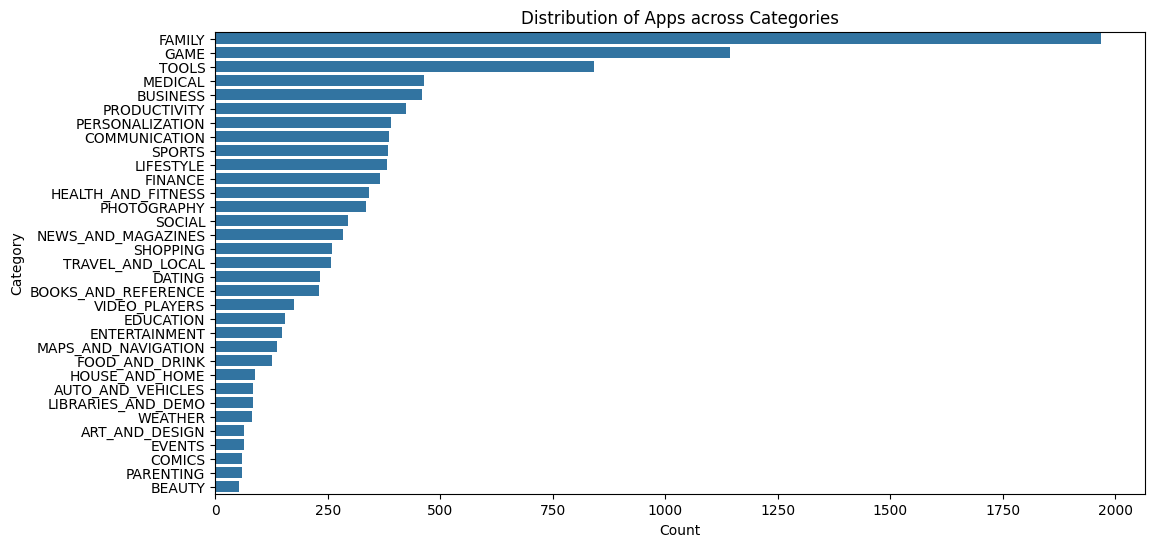

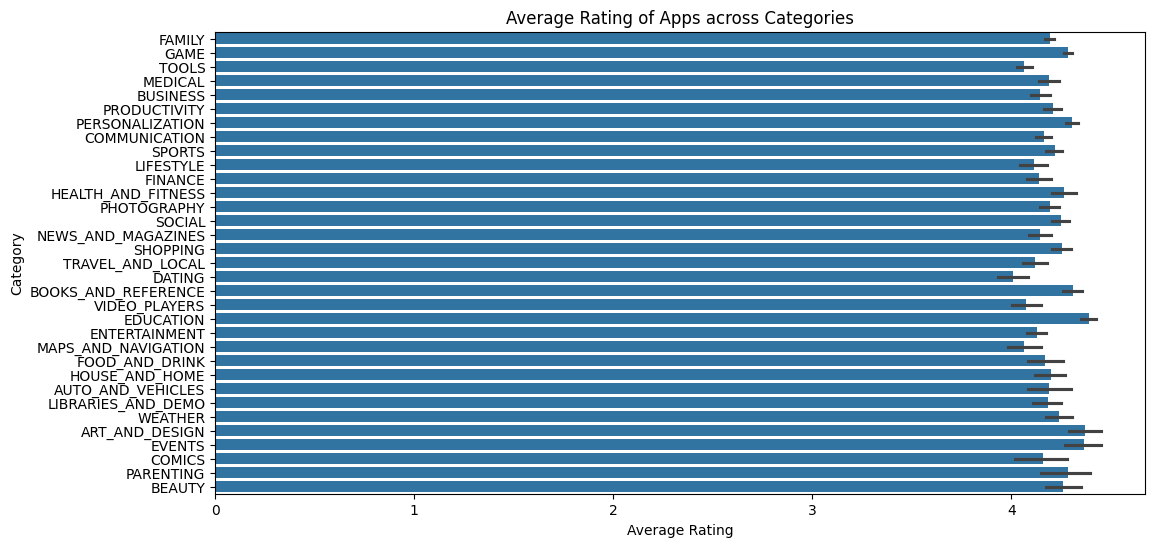

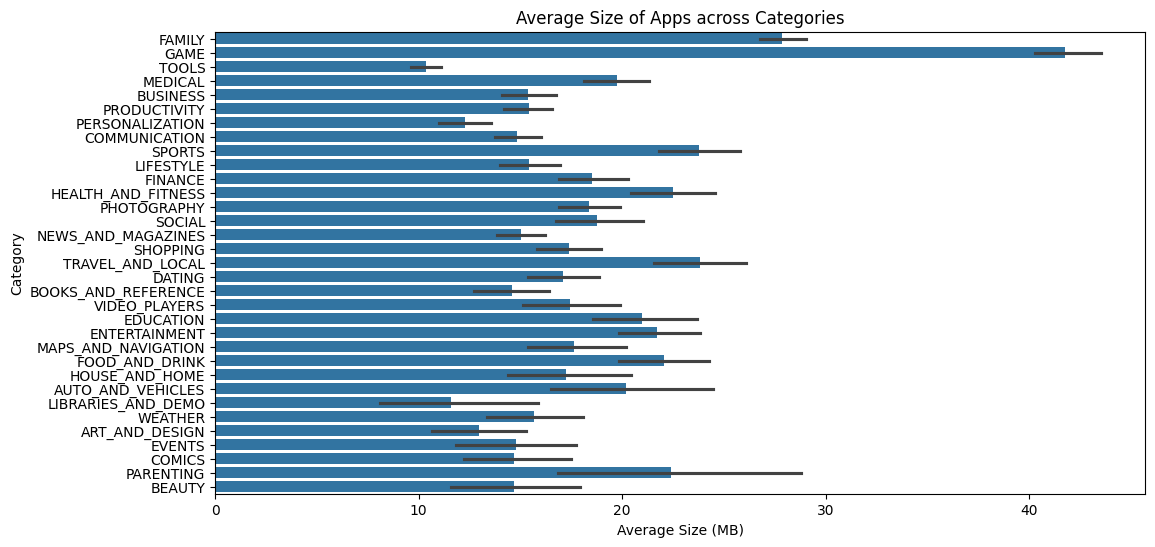

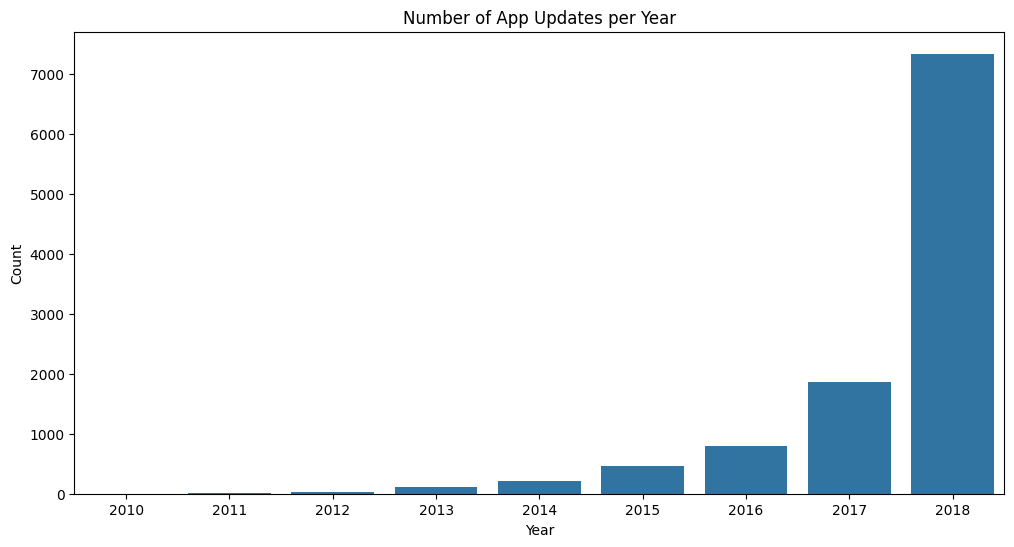

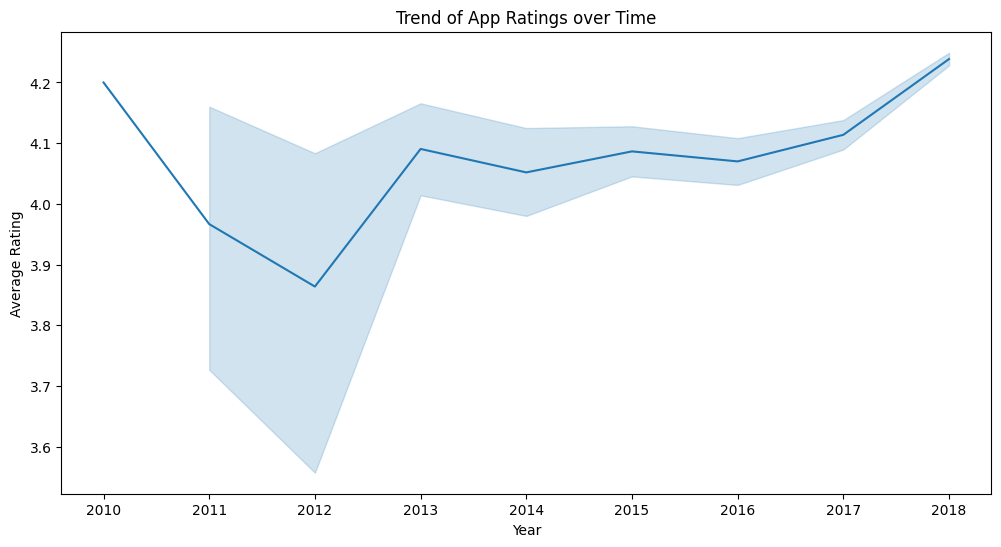

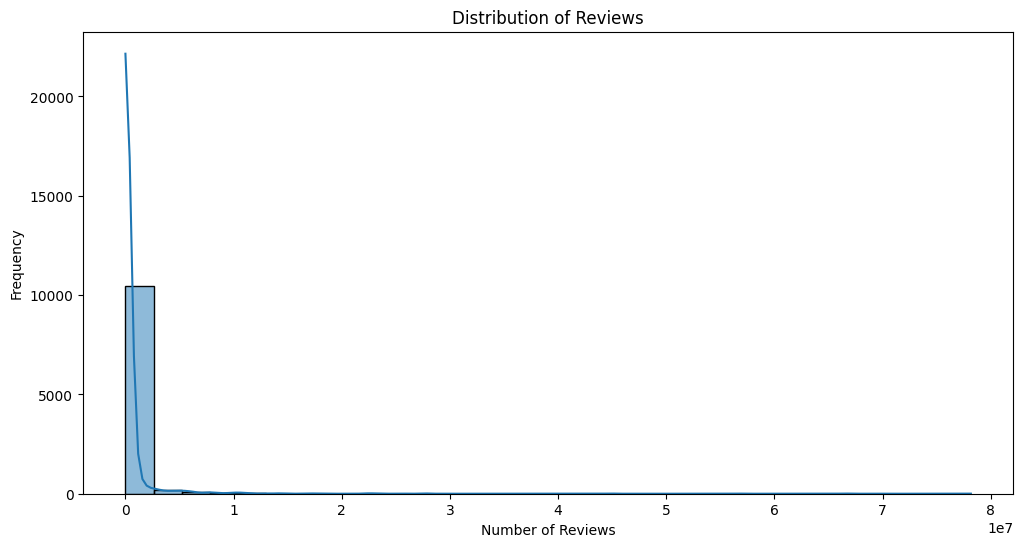

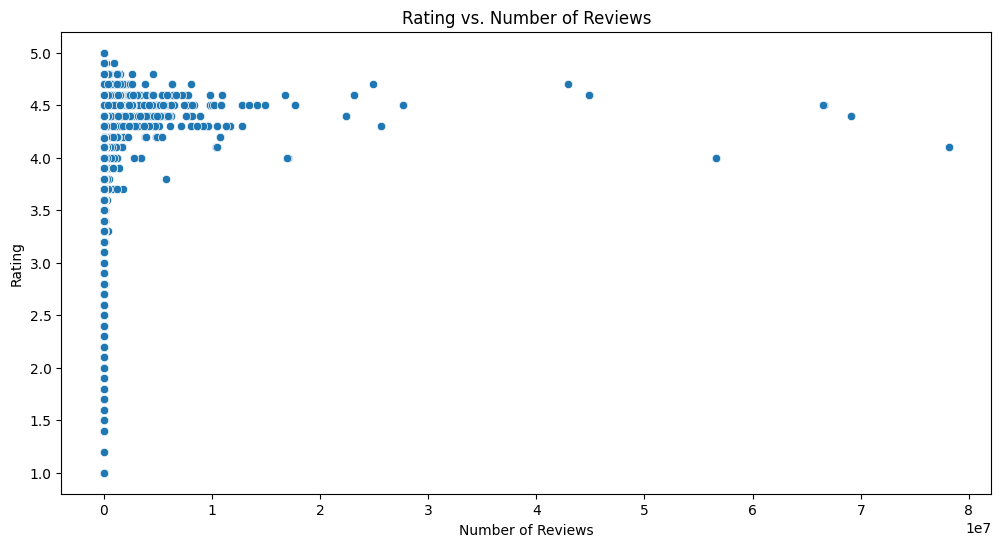

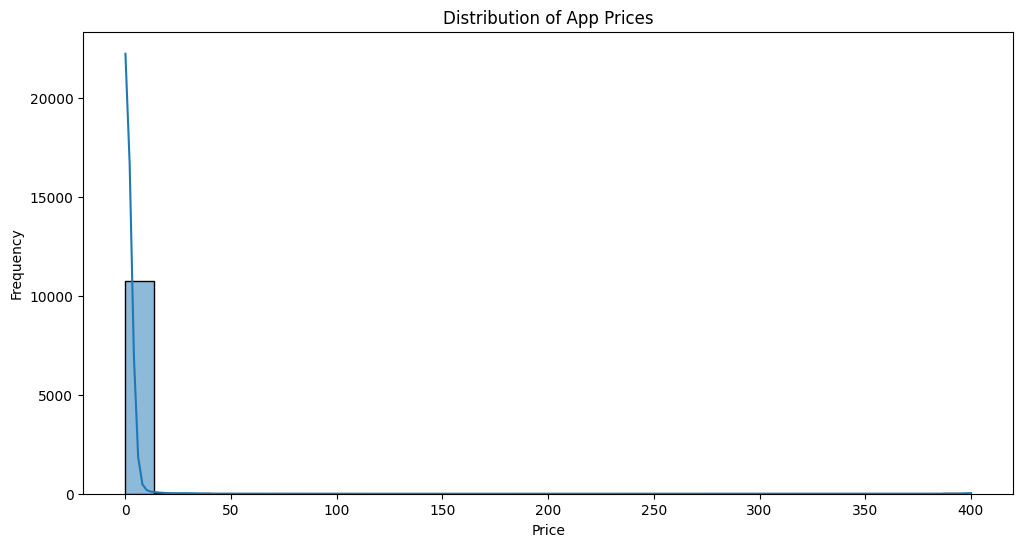

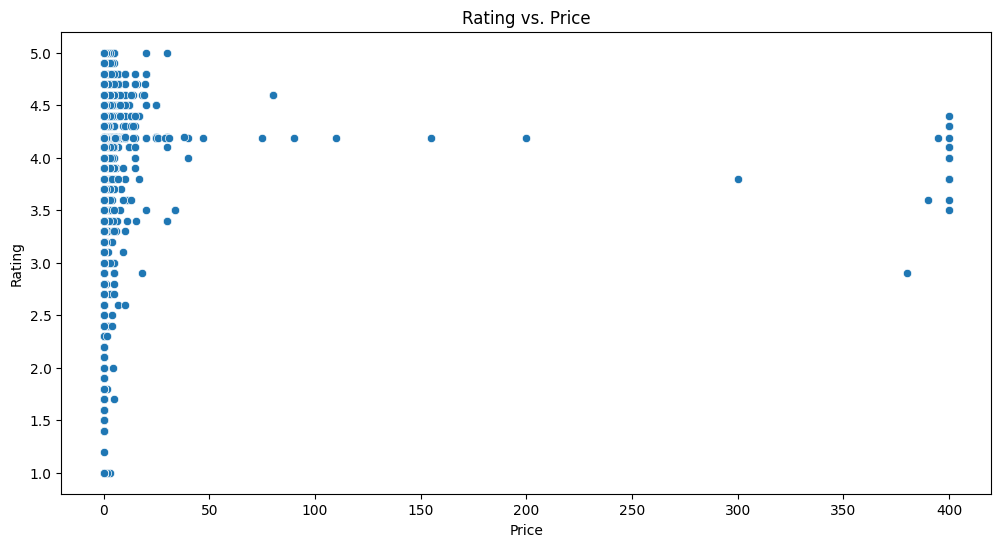

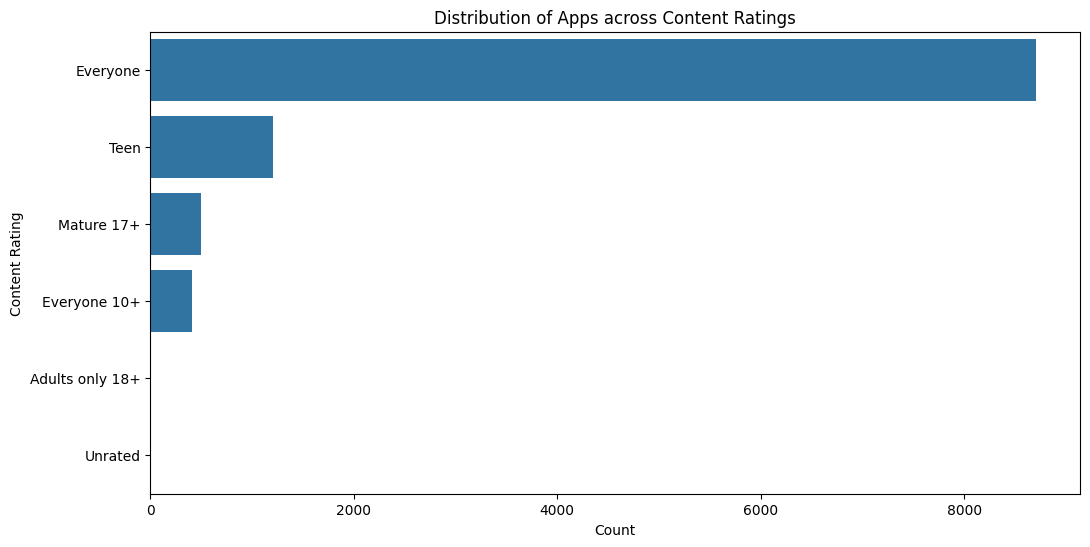

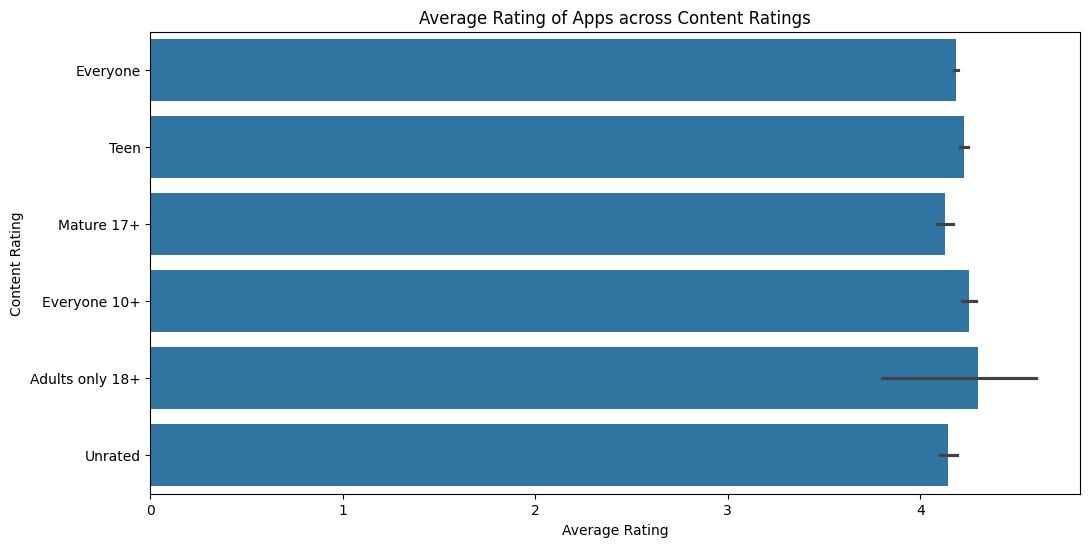

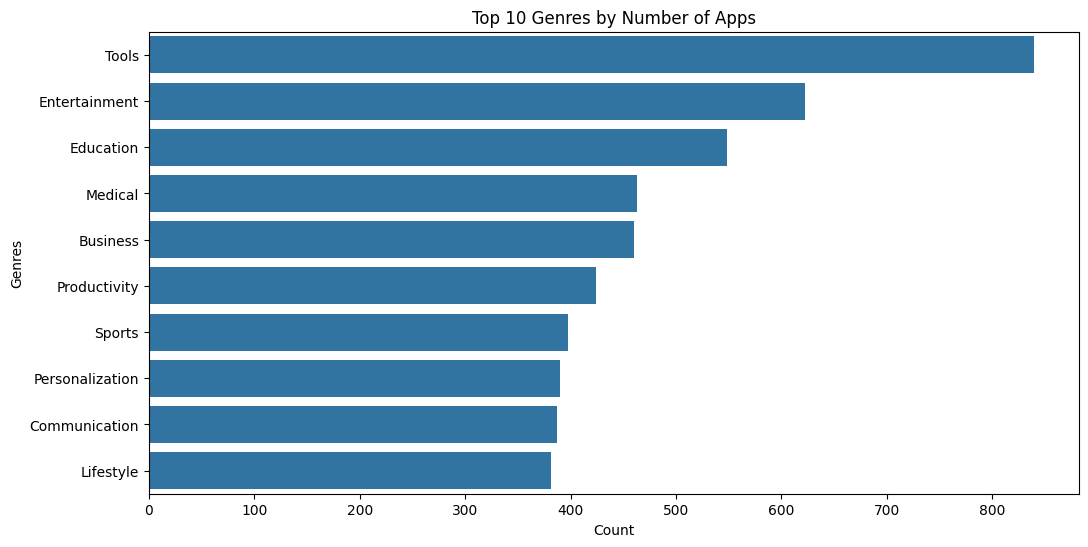

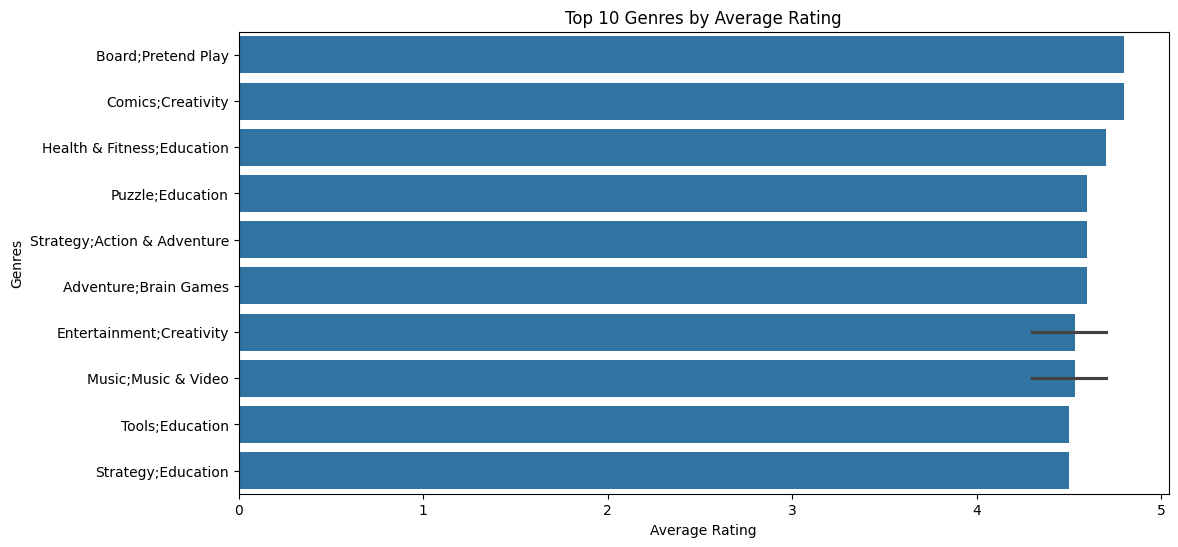

In [66]:
# Category-wise Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Apps across Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Average Rating of Apps across Categories')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Size_MB', y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Average Size of Apps across Categories')
plt.xlabel('Average Size (MB)')
plt.ylabel('Category')
plt.show()

# Time-based Analysis
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Year'] = df['Last Updated'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.title('Number of App Updates per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Rating', data=df)
plt.title('Trend of App Ratings over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# Review Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['Reviews'], bins=30, kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df)
plt.title('Rating vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

# Price Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Content Rating Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y='Content Rating', data=df, order=df['Content Rating'].value_counts().index)
plt.title('Distribution of Apps across Content Ratings')
plt.xlabel('Count')
plt.ylabel('Content Rating')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Content Rating', data=df, order=df['Content Rating'].value_counts().index)
plt.title('Average Rating of Apps across Content Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Content Rating')
plt.show()

# Genre Analysis
plt.figure(figsize=(12, 6))
sns.countplot(y='Genres', data=df, order=df['Genres'].value_counts().index[:10])
plt.title('Top 10 Genres by Number of Apps')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Genres', data=df, order=df.groupby('Genres')['Rating'].mean().sort_values(ascending=False).index[:10])
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

In [68]:
# Conclusion of the analysis

print("### Conclusion of the Google Playstore Data Analysis ###\n")

# Summary of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Key findings
print("Key Findings:")
print("- The 'Size' column was converted to KB and then to MB for consistency.")
print("- The 'Installs' column was cleaned by removing '+' and ',' characters and converted to integer.")
print("- The 'Price' column was cleaned by removing '$' character and converted to float.")
print("- Missing values in the 'Rating' column were imputed using KNNImputer.")
print("- All rows with missing values were removed, resulting in a clean dataset with no missing values.\n")

# Insights
print("Insights:")
print(f"- Top 10 categories with the highest average rating:\n{top_categories_by_rating}\n")
print(f"- Top 10 apps with the highest number of reviews:\n{top_apps_by_reviews}\n")
print(f"- Distribution of app sizes in MB:\n{df['Size_MB'].describe()}\n")
print(f"- Average rating by content rating:\n{avg_rating_by_content}\n")
print(f"- Average rating by app type (Free/Paid):\n{avg_rating_by_type}\n")
print(f"- Top 10 categories with the highest average app size in MB:\n{top_categories_by_size}\n")
print(f"- Top 10 apps with the highest number of installs:\n{top_apps_by_installs}\n")
print(f"- Top 10 apps with the highest rating:\n{top_apps_by_rating}\n")
print(f"- Average size of apps by category:\n{avg_size_by_category}\n")

# Additional checks
print("Additional Checks:")
print(f"- Missing values in each column:\n{missing_values}\n")
print(f"- Data types of each column:\n{df.dtypes}\n")
print(f"- Negative values in each numeric column:\n{negative_values}\n")
print(f"- Number of duplicate rows: {duplicate_rows}\n")

print("### End of Analysis ###")

### Conclusion of the Google Playstore Data Analysis ###

The dataset contains 10829 rows and 15 columns.

Key Findings:
- The 'Size' column was converted to KB and then to MB for consistency.
- The 'Installs' column was cleaned by removing '+' and ',' characters and converted to integer.
- The 'Price' column was cleaned by removing '$' character and converted to float.
- Missing values in the 'Rating' column were imputed using KNNImputer.
- All rows with missing values were removed, resulting in a clean dataset with no missing values.

Insights:
- Top 10 categories with the highest average rating:
Category
EDUCATION              4.387766
ART_AND_DESIGN         4.368352
EVENTS                 4.363105
BOOKS_AND_REFERENCE    4.311125
PERSONALIZATION        4.306508
GAME                   4.282431
PARENTING              4.281919
HEALTH_AND_FITNESS     4.266060
BEAUTY                 4.260503
SHOPPING               4.253897
Name: Rating, dtype: float64

- Top 10 apps with the highest numb

In [69]:
# Count duplicated values for each column
duplicated_values = df.apply(lambda x: x.duplicated().sum())
print(f'Duplicated values in each column:\n{duplicated_values}')

Duplicated values in each column:
App                1181
Category          10796
Rating            10789
Reviews            4830
Size_KB           10373
Installs          10809
Type              10827
Price             10737
Content Rating    10823
Genres            10710
Last Updated       9453
Current Ver        8046
Android Ver       10796
Size_MB           10373
Year              10820
dtype: int64


In [70]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify the number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")

Number of rows after removing duplicates: 10346


In [74]:
# top 10 categories having highest no. of apps
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

In [75]:
# Sort the dataframe by 'Price' in descending order and select the top 10 rows
top_selling_apps = df.sort_values(by='Price', ascending=False).head(10)

# Display the top 10 highest selling apps
print("Top 10 highest selling apps:\n", top_selling_apps[['App', 'Price']])

Top 10 highest selling apps:
                                     App   Price
4367           I'm Rich - Trump Edition  400.00
5358                         I am Rich!  399.99
5369                          I am Rich  399.99
4362                         💎 I'm rich  399.99
5359                 I am rich(premium)  399.99
5362                      I Am Rich Pro  399.99
5364     I am rich (Most expensive app)  399.99
9934  I'm Rich/Eu sou Rico/أنا غني/我很有錢  399.99
5373                 I AM RICH PRO PLUS  399.99
4197             most expensive app (H)  399.99


In [76]:
# Sort the dataframe by 'Rating' in descending order and select the top 30 rows
top_30_highest_rating_apps = df.sort_values(by='Rating', ascending=False).head(30)

# Display the top 30 highest rating apps
print("Top 30 highest rating apps:\n", top_30_highest_rating_apps[['App', 'Rating']])

Top 30 highest rating apps:
                                                      App  Rating
10837                   Fr. Mike Schmitz Audio Teachings     5.0
10820                                    Fr. Daoud Lamei     5.0
9806                                Dr. ES PV Calculator     5.0
9766                                           ER Assist     5.0
9911                                           daskal.eu     5.0
654                      Speeding Joyride & Car Meet App     5.0
6146                          ReactNative BG Geolocation     5.0
7731                                             CQ ESPM     5.0
7754                                           CricQuick     5.0
7756                                             iReadMe     5.0
7895                          Dine In CT - Food Delivery     5.0
7896                                         CT Checkout     5.0
7872                                   CT Cervical Spine     5.0
9705                                            EP Radio     

In [78]:
top_20_categories_by_installs = category_installs.sort_values(ascending=False).head(20)
print("Top 20 categories with the highest number of installs:\n", top_20_categories_by_installs)

Top 20 categories with the highest number of installs:
 Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452271905
FAMILY                 10041632405
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074483782
BOOKS_AND_REFERENCE     1916468576
SPORTS                  1528574498
HEALTH_AND_FITNESS      1361022512
BUSINESS                 863664865
FINANCE                  770348734
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                534823539
Name: Installs, dtype: int64


In [79]:
# Group by 'Type' and sum the 'Installs' for each type
type_installs = df.groupby('Type')['Installs'].sum().sort_values(ascending=False)

# Display the top 20 apps with the highest number of installs for each type
top_20_type_installs = type_installs.head(20)
print("Top 20 apps with the highest number of installs for each type:\n", top_20_type_installs)

Top 20 apps with the highest number of installs for each type:
 Type
Free    146561162546
Paid        69174871
Name: Installs, dtype: int64


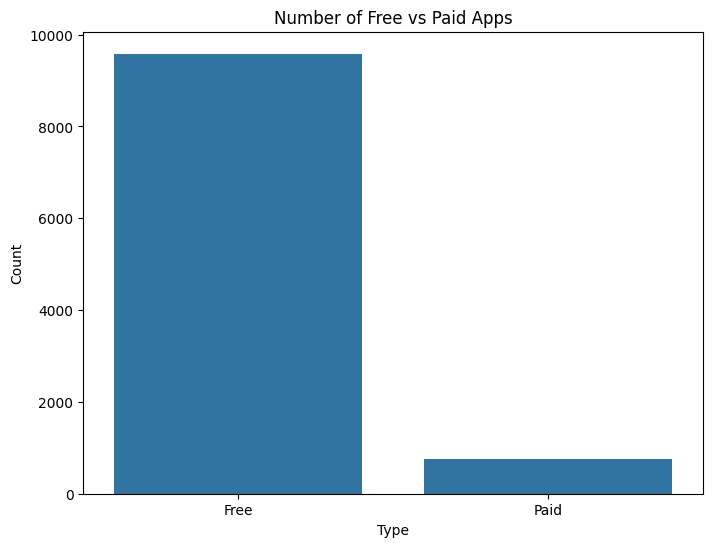

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Number of Free vs Paid Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()